In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/3w/all_features.csv')
data = data.drop(['Unnamed: 0'], axis=1)
X = data.loc[:, data.columns != 'class']
y = data['class']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(173425, 152)
(74326, 152)
(173425,)
(74326,)


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

num_samples = 173425
num_features = 152
num_classes = 9

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Definição do modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(1, num_features)))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(num_classes, activation='softmax'))

# Compilação do modelo
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
history = model_lstm.fit(X_train_reshaped, y_train_onehot, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test_onehot))

# Avaliação do modelo
test_loss, test_acc = model_lstm.evaluate(X_test_reshaped, y_test_onehot)
print("Test accuracy (LSTM):", test_acc)

Epoch 1/20
5420/5420 [==============================] - 24s 4ms/step - loss: 0.2791 - accuracy: 0.9061 - val_loss: 2.9195 - val_accuracy: 0.9358
Epoch 2/20
5420/5420 [==============================] - 19s 4ms/step - loss: 0.1652 - accuracy: 0.9418 - val_loss: 3.6287 - val_accuracy: 0.9464
Epoch 3/20
5420/5420 [==============================] - 21s 4ms/step - loss: 0.1351 - accuracy: 0.9523 - val_loss: 2.2403 - val_accuracy: 0.9530
Epoch 4/20
5420/5420 [==============================] - 21s 4ms/step - loss: 0.1175 - accuracy: 0.9579 - val_loss: 2.5923 - val_accuracy: 0.9566
Epoch 5/20
5420/5420 [==============================] - 21s 4ms/step - loss: 0.1056 - accuracy: 0.9623 - val_loss: 3.7996 - val_accuracy: 0.9606
Epoch 6/20
5420/5420 [==============================] - 21s 4ms/step - loss: 0.1001 - accuracy: 0.9654 - val_loss: 4.0752 - val_accuracy: 0.9643
Epoch 7/20
5420/5420 [==============================] - 18s 3ms/step - loss: 0.0914 - accuracy: 0.9678 - val_loss: 3.5230 - val_ac

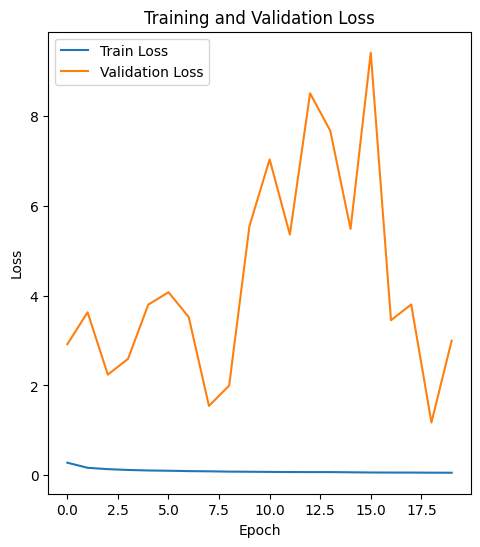

In [14]:
#Plot das curvas de treinamento e validação de perda
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

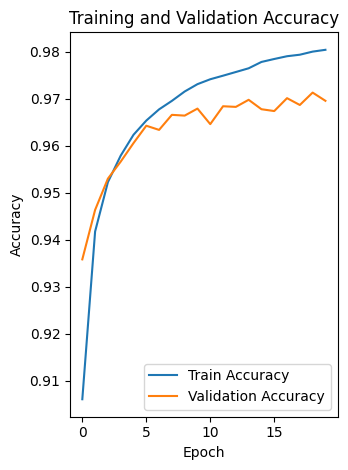

In [10]:
# Plot das curvas de treinamento e validação de acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Previsões do modelo
y_pred_onehot = model_lstm.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred_onehot, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

2323/2323 [==============================] - 7s 3ms/step


In [12]:
# Cálculo do F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average=None)
print("Weighted F1-score:", f1)

# Avaliação do modelo
test_loss, test_acc = model_lstm.evaluate(X_test_reshaped, y_test_onehot)
print("Test accuracy (LSTM):", test_acc)

Weighted F1-score: [0.9449692  0.96526629 0.9596733  0.95449769 0.9716824  0.97090376
 0.99273451 0.88138862 0.97662831]
2323/2323 [==============================] - 6s 2ms/step - loss: 2.9970 - accuracy: 0.9696
Test accuracy (LSTM): 0.9695799350738525


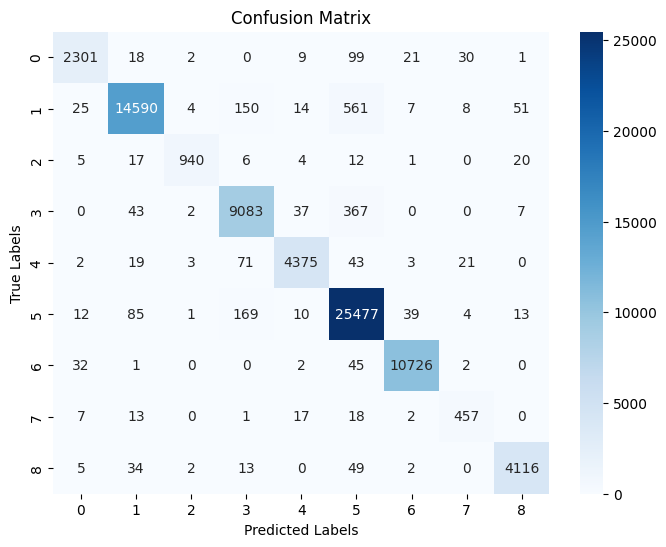

In [15]:
# Cálculo da matriz de confusão
confusion = confusion_matrix(y_true_classes, y_pred_classes)

# Plot da matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

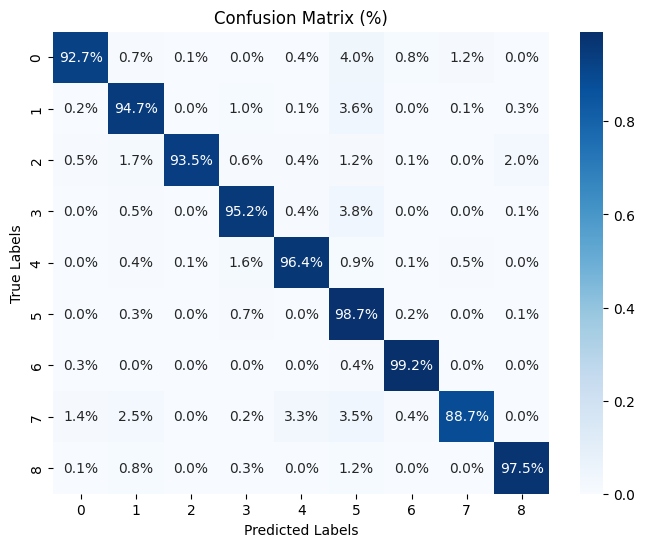

In [20]:
# Cálculo da matriz de confusão em porcentagem
confusion = confusion_matrix(y_true_classes, y_pred_classes)
confusion_percent = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Plot da matriz de confusão em porcentagem como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, fmt=".1%", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (%)')
plt.show()

In [21]:
f1

array([0.9449692 , 0.96526629, 0.9596733 , 0.95449769, 0.9716824 ,
       0.97090376, 0.99273451, 0.88138862, 0.97662831])

In [27]:
teste = {'Class':[0,1,2,3,4,5,6,7,8], 'F1':f1}
df_f1 = pd.DataFrame(teste)
df_f1

,Class,F1
0,0,0.944969
1,1,0.965266
2,2,0.959673
3,3,0.954498
4,4,0.971682
5,5,0.970904
6,6,0.992735
7,7,0.881389
8,8,0.976628


In [23]:
df_f1 = pd.DataFrame(teste)